# Introduction

<div class="alert alert-warning">
<font color=black>

**What?** Backpropagation stepo-by-step

</font>
</div>

# What is backprogation and what is not?

<div class="alert alert-info">
<font color=black>

- Backprogtion is the the answer to **How do we propagate the gradient?**
- Backpropagation is not about how you compute the gradient. This is calculus.
- Nevertheless you cannot really talk about backpropagation withouth having the gradient, hence the confusion in theliterature.

</font>
</div>

# Import modules

In [17]:
import numpy as np
import math
from pylab import rcParams
import matplotlib.pyplot as plt

# Example #1

<div class="alert alert-info">
<font color=black>

- `data` has shape 4x2
- `target` has shape 4x1
- `weights_0_1` has shape 2x3. Please note that 2 is because we have two features and 3 could have been different.
- `weights_1_2` has shape 3x1. Please note that that 1 is because the target has only one column and 3 is because the previous layer has 3 columns.

</font>
</div>

In [5]:
np.random.seed(0)

# Define data & target
data = np.array([[0,0],[0,1],[1,0],[1,1]]) 
target = np.array([[0],[1],[0],[1]])
print("Data shape", data.shape)
print("Target shape", target.shape)

# Definie initial weight matrix
weights_0_1 = np.random.rand(2,3) 
weights_1_2 = np.random.rand(3,1)
print("First weight layer shape", weights_0_1.shape)
print("Second weight layer shape", weights_1_2.shape)
print("")

# The print statement helps you check the dimensions of matrices and vectors
for i in range(25):
    print("Iteration No: ", i)
          
    # Step #1 - PREDICT (forward pass essentially)
    print("Start forward pass")
    layer_1 = data.dot(weights_0_1)
    print("In", data.shape, weights_0_1.shape, " Out", layer_1.shape)
    layer_2 = layer_1.dot(weights_1_2)
    print("In", layer_1.shape, weights_1_2.shape, " Out", layer_2.shape)
    
    
    # Step #2 - COMPARE - COMPUTE THE LOSS
    print("Compute loss")    
    diff = (layer_2 - target) 
    print("In", layer_2.shape, target.shape, " Out", diff.shape)
    # Compute the squared loss, this is a scalar
    loss = np.sum(diff**2)      
    
    # Step #3 - BACK PROPAGATION
    print("Start backward pass")
    layer_1_grad = diff.dot(weights_1_2.transpose()) 
    print("In ", diff.shape, weights_1_2.transpose().shape, " Out", layer_1_grad.shape)    
    
    weight_1_2_update = layer_1.transpose().dot(diff)
    print("In ", layer_1.transpose().shape, diff.shape, " Out", weight_1_2_update.shape)    
    
    weight_0_1_update = data.transpose().dot(layer_1_grad)
    print("In ", data.transpose().shape, layer_1_grad.shape, " Out", weight_0_1_update.shape)    
    
    learningRate = 0.1
    weights_1_2 -= weight_1_2_update * learningRate
    weights_0_1 -= weight_0_1_update * learningRate
    print("Loss: ", loss)
    print("***************")


Data shape (4, 2)
Target shape (4, 1)
First weight layer shape (2, 3)
Second weight layer shape (3, 1)

Iteration No:  0
Start forward pass
In (4, 2) (2, 3)  Out (4, 3)
In (4, 3) (3, 1)  Out (4, 1)
Compute loss
In (4, 1) (4, 1)  Out (4, 1)
Start backward pass
In  (4, 1) (1, 3)  Out (4, 3)
In  (3, 4) (4, 1)  Out (3, 1)
In  (2, 4) (4, 3)  Out (2, 3)
Loss:  5.066439994622395
***************
Iteration No:  1
Start forward pass
In (4, 2) (2, 3)  Out (4, 3)
In (4, 3) (3, 1)  Out (4, 1)
Compute loss
In (4, 1) (4, 1)  Out (4, 1)
Start backward pass
In  (4, 1) (1, 3)  Out (4, 3)
In  (3, 4) (4, 1)  Out (3, 1)
In  (2, 4) (4, 3)  Out (2, 3)
Loss:  0.4959907791902342
***************
Iteration No:  2
Start forward pass
In (4, 2) (2, 3)  Out (4, 3)
In (4, 3) (3, 1)  Out (4, 1)
Compute loss
In (4, 1) (4, 1)  Out (4, 1)
Start backward pass
In  (4, 1) (1, 3)  Out (4, 3)
In  (3, 4) (4, 1)  Out (3, 1)
In  (2, 4) (4, 3)  Out (2, 3)
Loss:  0.4180671892167177
***************
Iteration No:  3
Start forward pa

<div class="alert alert-info">
<font color=black>

- After the training is over we can try to use the weights is this very simple MLP to predict the output.
- As you can result is not perfect but we are getting there!

</font>
</div>

In [6]:
layer_1 = data.dot(weights_0_1)    
layer_2 = layer_1.dot(weights_1_2)    
print("Final prediction:", layer_2)

Final prediction: [[0.        ]
 [0.97150256]
 [0.03588757]
 [1.00739012]]


# Example #2

<div class="alert alert-info">
<font color=black>

- We can easily use numpy to fit a third order polynomial to sine function by manually implementing the forward and backward passes through the network using numpy operations.

</font>
</div>

In [13]:
# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

In [18]:
def initialiseCoeffs():   
    """Initialise coefficients
    
    Randomly initialize weights for a third degree 
    polynomial. Initialise them to zero is always a bad 
    idea! This is much more true even for NNs
    """
    
    a = np.random.randn()
    b = np.random.randn()
    c = np.random.randn()
    d = np.random.randn()
    
    print(f'Coefficient: a={a}, b= {b}, c={c}, d={d}')
    
    return a,b,c,d


def forwardPass(a,b,c,d):
    """Compute the forward pass
    
    In this case this is nothing more than the 
    evaluation of the polynomial.    
    """
    
    # y = a + b x + c x^2 + d x^3
    y = a + b * x + c * x ** 2 + d * x ** 3
    
    return y


def computeLoss(yPred, y):
    """Compute loss.
    
    In particular we are computing the
    square error.
    """

    loss = (1/len(y)) * np.square(yPred - y).sum()
    
    return loss

def backwardPass(yPred, y):   
    """Compute the backward pass.
    
    dLoss_dyPred = 
    dLoss_da     =
    dLoss_db     = 
    dLoss_dc     =
    dLoss_dd     =    
    """
    
    dLoss_dyPred = 2.0 * (yPred - y)
    dLoss_da = dLoss_dyPred.sum()
    dLoss_db = (dLoss_dyPred * x).sum()
    dLoss_dc = (dLoss_dyPred * x ** 2).sum()
    dLoss_dd = (dLoss_dyPred * x ** 3).sum()
    
    return dLoss_da, dLoss_db, dLoss_dc, dLoss_dd


def updateCeoffs(dLoss_da, dLoss_db, dLoss_dc, dLoss_dd, learning_rate, a,b,c,d):
    """Update coeffiecients
    
    The update is done via gradient descent:
    new = old - learningRate * gradient    
    """
    
    a -= learning_rate * dLoss_da
    b -= learning_rate * dLoss_db
    c -= learning_rate * dLoss_dc
    d -= learning_rate * dLoss_dd
    
    return a,b,c,d

In [19]:
lossHistory = []
learning_rate = 1e-6
epochs = 2000
a,b,c,d = initialiseCoeffs()

for t in range(epochs):
    
    # FORWARD pass: compute predicted y    
    yPred = forwardPass(a,b,c,d)
    # just to make sure it is using the initial one
    if t == 0: print(f'\nInitial coeffs: a={a}, b= {b}, c={c}, d={d}')
    
    # Compute and print loss (squared error)
    loss = computeLoss(yPred,y)
    lossHistory.append(loss)
    
    # Update the user of the learning history
    if t % 200 == 199:
        print("")
        print(f"Epoch: {t} with loss: {loss:.4f}")
        print(f'Updated coeffs: a={a:.4f}, b= {b:.4f}, c={c:.4f}, d={d:.4f}')

    # BACKWARD to compute gradients of a, b, c, d with respect to loss
    dLoss_da, dLoss_db, dLoss_dc, dLoss_dd = backwardPass(yPred,y)

    # Update weights
    a,b,c,d = updateCeoffs(dLoss_da, dLoss_db, dLoss_dc, dLoss_dd, learning_rate, a,b,c,d)

print()
print(f"Result: y = {a:.4f} + {b:.4f} x + {c:.4f} x^2 + {d:.4f} x^3")
print()

Coefficient: a=-0.3744716909802062, b= 0.27519831557632024, c=-0.9607546117337881, d=0.37692697499528294

Initial coeffs: a=-0.3744716909802062, b= 0.27519831557632024, c=-0.9607546117337881, d=0.37692697499528294

Epoch: 199 with loss: 0.1070
Updated coeffs: a=-0.1437, b= 0.4356, c=0.0248, d=-0.0334

Epoch: 399 with loss: 0.0499
Updated coeffs: a=-0.1017, b= 0.5783, c=0.0175, d=-0.0537

Epoch: 599 with loss: 0.0246
Updated coeffs: a=-0.0720, b= 0.6726, c=0.0124, d=-0.0671

Epoch: 799 with loss: 0.0134
Updated coeffs: a=-0.0509, b= 0.7350, c=0.0088, d=-0.0760

Epoch: 999 with loss: 0.0084
Updated coeffs: a=-0.0360, b= 0.7762, c=0.0062, d=-0.0819

Epoch: 1199 with loss: 0.0062
Updated coeffs: a=-0.0255, b= 0.8035, c=0.0044, d=-0.0858

Epoch: 1399 with loss: 0.0052
Updated coeffs: a=-0.0180, b= 0.8215, c=0.0031, d=-0.0883

Epoch: 1599 with loss: 0.0048
Updated coeffs: a=-0.0128, b= 0.8335, c=0.0022, d=-0.0900

Epoch: 1799 with loss: 0.0046
Updated coeffs: a=-0.0090, b= 0.8413, c=0.0016, 

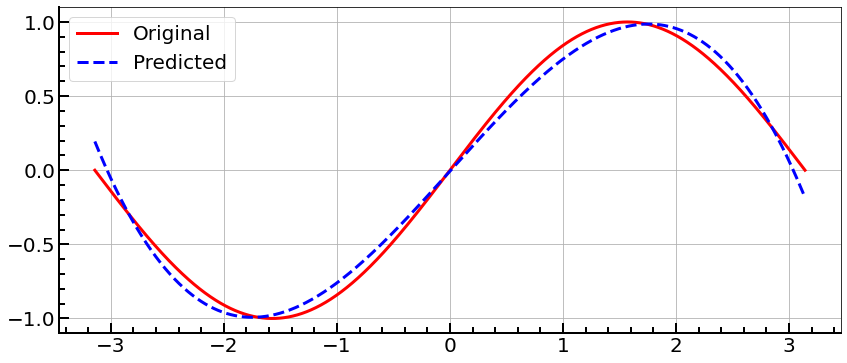

In [27]:
# a,b,c,d have the last value computed
yPred = a + b * x + c * x ** 2 + d * x ** 3

rcParams['figure.figsize'] = 14, 6
rcParams['font.size'] = 20
fig = plt.figure() 
ax = fig.add_subplot(111) 

plt.plot(x, y, "r-", lw = 3, label = "Original")
plt.plot(x, yPred, "b--", lw = 3,label = "Predicted")

ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()
ax.minorticks_on()
ax.legend()
plt.show()

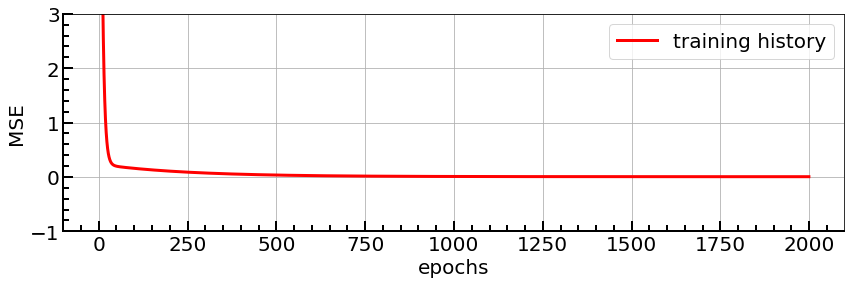

In [32]:
rcParams['figure.figsize'] = 14, 4
rcParams['font.size'] = 20
fig = plt.figure() 
ax = fig.add_subplot(111) 

plt.plot(range(epochs), lossHistory, "r-", lw = 3, label = "training history")

ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.set_ylim(-1, 3)
ax.set_xlabel('epochs')
ax.set_ylabel('MSE')
ax.grid()
ax.minorticks_on()
#plt.yscale('log')
ax.legend()
plt.show()

# References

<div class="alert alert-warning">
<font color=black>

- Grokking deep learning, Andrew W. Task 
- [Code available in this GitHub repository](https://github.com/iamtrask/Grokking-Deep-Learning)
- [Available on Google books](https://books.google.co.uk/books?hl=en&lr=&id=0zczEAAAQBAJ&oi=fnd&pg=PT25&dq=Grokking-Deep-Learning&ots=-kAj0RlLxI&sig=P2qD8ZSvOYc6k9yttDfebqbgnec#v=onepage&q=Grokking-Deep-Learning&f=false)
- [Difference btw str and repr](https://www.journaldev.com/22460/python-str-repr-functions)

</font>
</div>